In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score, accuracy_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest, f_regression, chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
import warnings



In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/Aswrecker/PrajwalDahal_2406799/main/world_risk_index.csv",encoding='utf-8')

Creator: The dataset is derived from the WorldRiskReport and its uploaded by Mrinal tyagi in kaggle.

Alignment with UNSDG: This dataset aligns with UNSDG Goal 13: Climate Action, as it assesses disaster risk, exposure, vulnerability, which are crucial for understanding climate related hazards and resilience strategies.

Key Questions for Analysis:
Which countries have the highest and lowest risk on average?
How does exposure correlate with vulnerability?
How has the World Risk Index changed over time and also for some specific countries?
Do highly exposed countries also have high vulnerability, or are there exceptions?

Dataset Suitability for Analysis:
Completeness: Contains multiple years of data across various countries.
Relevance: Directly addresses climate risk and disaster preparedness.
Quality: Requires standardizing country names, handling missing values and changing the column 'Region' to 'Country' because the columns are all countries.

DATA CLEANING AND SUMMARY STATISTICS

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Region                       542 non-null    object 
 1   WRI                          542 non-null    float64
 2   Exposure                     542 non-null    float64
 3   Vulnerability                542 non-null    float64
 4   Susceptibility               542 non-null    float64
 5   Lack of Coping Capabilities  542 non-null    float64
 6   Lack of Adaptive Capacities  542 non-null    float64
 7   Year                         542 non-null    int64  
 8   Exposure Category            542 non-null    object 
 9   WRI Category                 541 non-null    object 
 10  Vulnerability Category       539 non-null    object 
 11  Susceptibility Category      542 non-null    object 
dtypes: float64(6), int64(1), object(5)
memory usage: 50.9+ KB


In [5]:
data.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
count,542.000000,542.000000,542.00000,542.000000,542.000000,542.000000,542.000000
mean,7.894391,16.502269,46.68203,29.591790,71.995849,38.458376,2020.001845
std,6.355517,11.988968,13.94912,15.292472,14.248271,14.780253,0.816872
min,0.300000,0.850000,21.11000,8.320000,36.440000,11.160000,2019.000000
25%,3.565000,10.420000,36.28250,17.625000,62.967500,27.272500,2019.000000
50%,6.505000,13.130000,46.11000,23.910000,75.470000,37.420000,2020.000000
75%,9.632500,17.730000,57.33500,40.517500,83.335000,50.107500,2021.000000
max,56.710000,99.880000,76.34000,70.830000,94.140000,70.130000,2021.000000


In [6]:
data.rename(columns={'Region': 'Country'}, inplace=True)
warnings.filterwarnings('ignore')

In [7]:
data.head()

,Country,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,56.71,99.88,56.78,35.32,84.36,50.66,2019,Very High,Very High,High,High
1,Antigua und Barbuda,30.80,69.95,44.03,23.38,76.65,32.05,2019,Very High,Very High,Medium,Medium
2,Tonga,29.39,61.41,47.86,28.19,79.92,35.47,2019,Very High,Very High,Medium,Medium
3,Salomonen,29.36,48.31,60.77,46.37,80.95,55.00,2019,Very High,Very High,High,Very High
4,Guyana,22.87,44.98,50.84,26.41,79.68,46.44,2019,Very High,Very High,High,Medium


In [8]:
data.tail()

,Country,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
537,Grenada,1.06,2.40,43.98,26.36,69.21,36.38,2021,Very Low,Very Low,Medium,Medium
538,Saudi-Arabien,0.94,2.58,36.46,13.83,68.21,27.34,2021,Very Low,Very Low,Low,Very Low
539,St. Vincent und d. Grenadinen,0.70,1.62,43.00,28.16,69.86,30.97,2021,Very Low,Very Low,Medium,Medium
540,Malta,0.69,2.31,29.96,15.04,54.76,20.09,2021,Very Low,Very Low,Very Low,Very Low
541,Katar,0.30,0.85,34.80,9.03,65.03,30.34,2021,Very Low,Very Low,Low,Very Low


In [9]:
data.isnull().sum()

Country                        0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    0
Year                           0
Exposure Category              0
WRI Category                   1
Vulnerability Category         3
Susceptibility Category        0
dtype: int64

In [10]:
data.dropna(inplace=True)

In [11]:
data.isnull().sum()

Country                        0
WRI                            0
Exposure                       0
Vulnerability                  0
Susceptibility                 0
Lack of Coping Capabilities    0
Lack of Adaptive Capacities    0
Year                           0
Exposure Category              0
WRI Category                   0
Vulnerability Category         0
Susceptibility Category        0
dtype: int64

In [12]:
data['Country'].nunique()

184

EXPLORATORY DATA VISUALIZATIONS

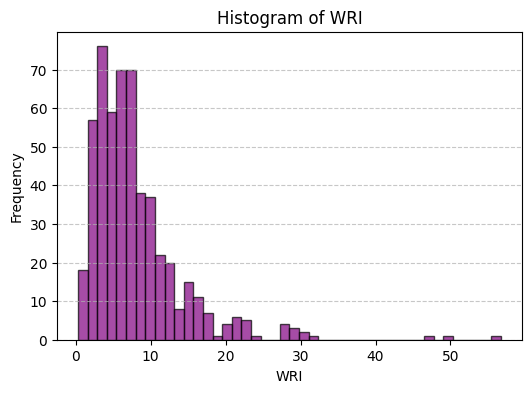

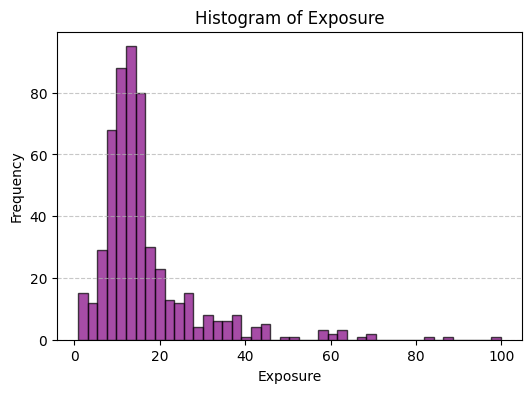

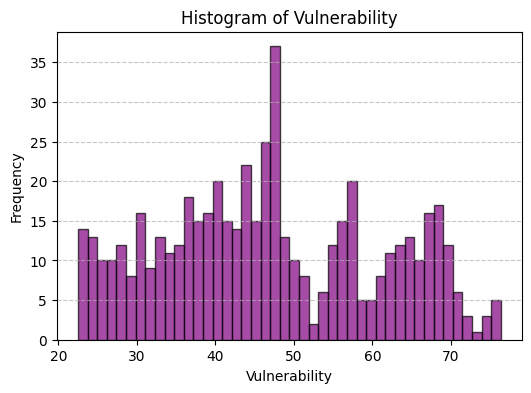

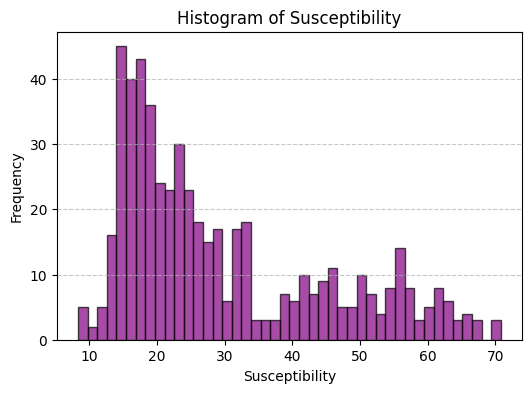

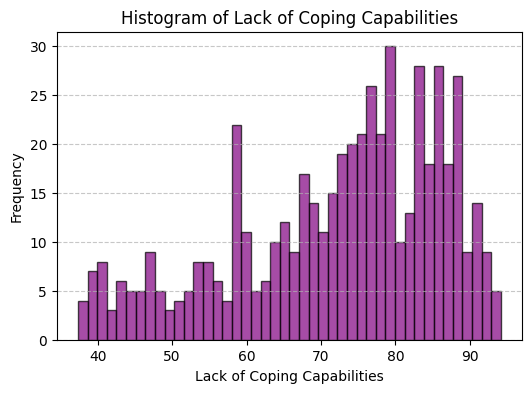

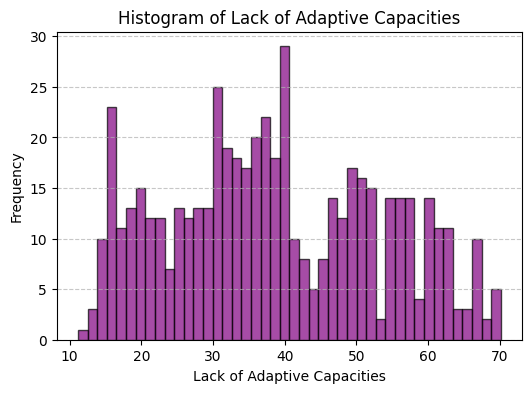

In [13]:
#Histograms for each column
columns=['WRI','Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities','Lack of Adaptive Capacities']
for col in columns:
  plt.figure(figsize=(6, 4))
  plt.hist(data[col], bins=44, edgecolor='black', alpha=0.7,color='purple')
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.title(f"Histogram of {col}")
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.show()


Insight: The histograms above show the distribution of values for each key metric, identifying skewness and concentration of values.

Lower Bound: -5.451250000000003
Upper Bound: 18.718750000000004
Outliers remaining after manual cleaning: 0


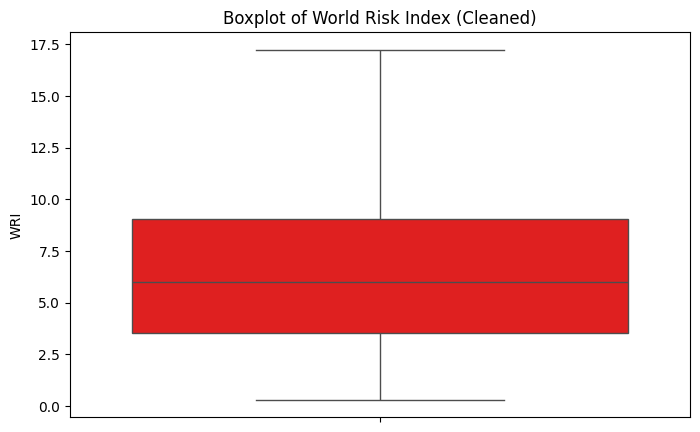

count    508.000000
mean       6.795945
std        3.902334
min        0.300000
25%        3.520000
50%        5.980000
75%        9.057500
max       18.020000
Name: WRI, dtype: float64
Data size after cleaning: 508


In [14]:
# Define the column to check for outliers
column = 'WRI'  # Replace with your column name

# Compute Q1, Q3, and IQR
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds based on IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the bounds for debugging
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")

# Remove outliers based on IQR
data_cleaned = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Manually remove extreme values outside the expected range (if any)
data_cleaned = data_cleaned[(data_cleaned[column] >= 0) & (data_cleaned[column] <= upper_bound)]

# Reset index after cleaning
data_cleaned.reset_index(drop=True, inplace=True)

# Check if any outliers remain
outliers_remaining = data_cleaned[(data_cleaned[column] < 0) | (data_cleaned[column] > upper_bound)]
print(f"Outliers remaining after manual cleaning: {len(outliers_remaining)}")

# Plot the cleaned boxplot
# Plot the cleaned boxplot and hide outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=data_cleaned[column], color='red', showfliers=False)
plt.title("Boxplot of World Risk Index (Cleaned)")
plt.show()


# Optional: Check summary statistics of the cleaned data
print(data_cleaned[column].describe())

# Check the size of the cleaned data
print(f"Data size after cleaning: {data_cleaned.shape[0]}")

In [15]:
country_wri_avg = data.groupby('Country')['WRI'].mean().reset_index()
riskiest_country=country_wri_avg.loc[country_wri_avg['WRI'].idxmax()]
safest_country=country_wri_avg.loc[country_wri_avg['WRI'].idxmin()]
print(f"The country which has been the riskiest over the years is {riskiest_country['Country']} with WRI {riskiest_country['WRI']:.2f}")
print(f"The country which has been the safest over the years is {safest_country['Country']} with WRI {safest_country['WRI']:.2f}")

The country which has been the riskiest over the years is Vanuatu with WRI 51.39
The country which has been the safest over the years is Katar with WRI 0.31


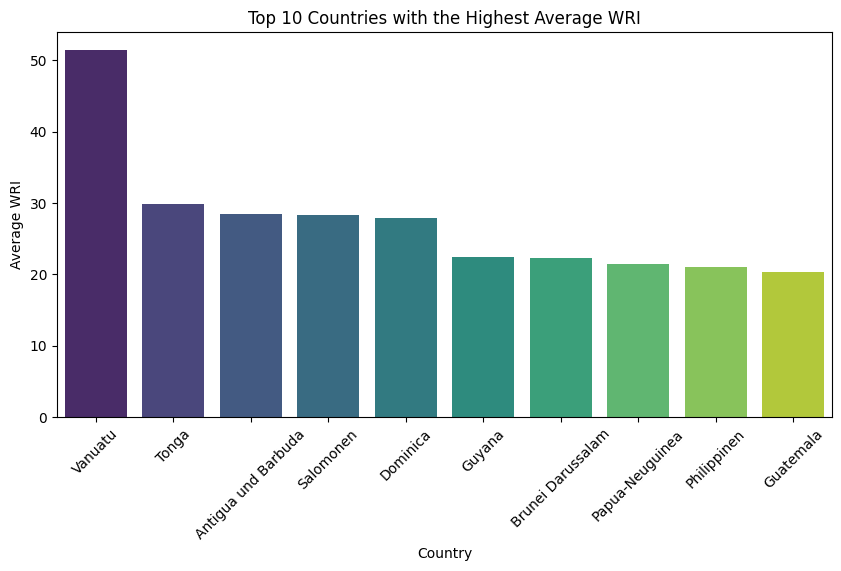

In [16]:
top_risky_countries=country_wri_avg.nlargest(10,'WRI')
plt.figure(figsize=(10,5))
sns.barplot(data=top_risky_countries,x='Country',y='WRI',hue='Country',palette='viridis')
plt.xlabel("Country")
plt.ylabel("Average WRI")
plt.title("Top 10 Countries with the Highest Average WRI")
plt.xticks(rotation=45)
plt.show()

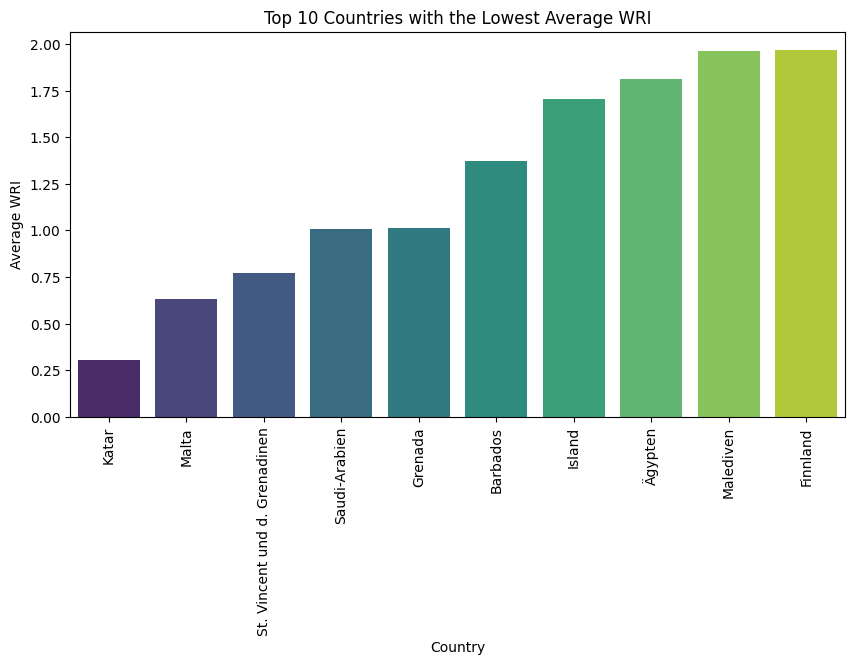

In [17]:
top_safest_countries=country_wri_avg.nsmallest(10,'WRI')
plt.figure(figsize=(10,5))
sns.barplot(data=top_safest_countries,x='Country',y='WRI',hue='Country',palette='viridis')
plt.xlabel("Country")
plt.ylabel("Average WRI")
plt.title("Top 10 Countries with the Lowest Average WRI")
plt.xticks(rotation=90)
plt.show()

As from the bar graph, we can see that Qatar is the safest country


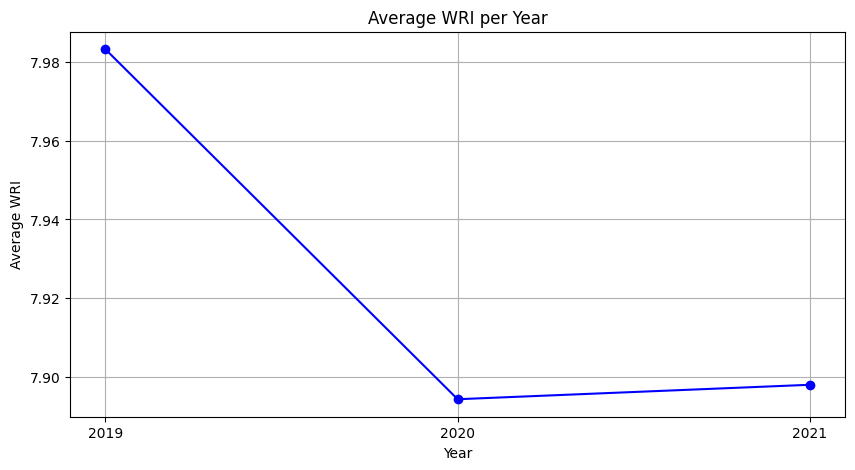

In [18]:

data['Year'] = data['Year'].astype(int)

# Group by Year and calculate mean WRI
avg_wri_per_year = data.groupby('Year')['WRI'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_wri_per_year.index.astype(int), avg_wri_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Average WRI")
plt.title("Average WRI per Year")
plt.xticks(avg_wri_per_year.index.astype(int))
plt.grid(True)
plt.show()


From the above lineplot, we can see that WRI has been increasing over the years and it peaked on 2019 and slightly dropped after.

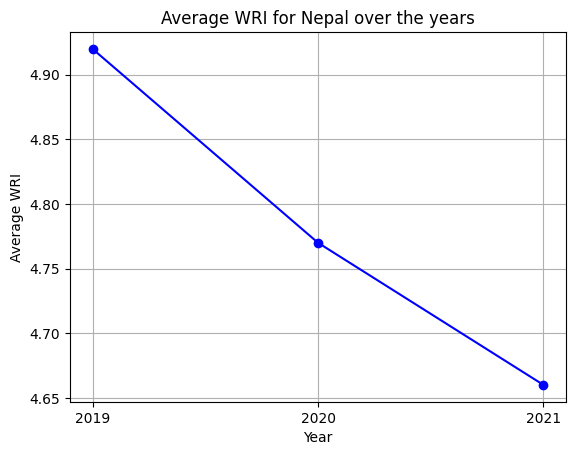

In [19]:

country = 'Nepal'
data[data['Country'] == country].groupby('Year')['WRI'].mean().plot(marker='o', linestyle='-', color='b')

plt.xlabel("Year")
plt.ylabel("Average WRI")
plt.title(f"Average WRI for {country} over the years")
plt.xticks(data['Year'].unique())  # Ensure proper year labels
plt.grid(True)
plt.show()

From the above line plot, we can see that Nepal's WRI has been decreasing over the years which shows that this country has been improving on safety.

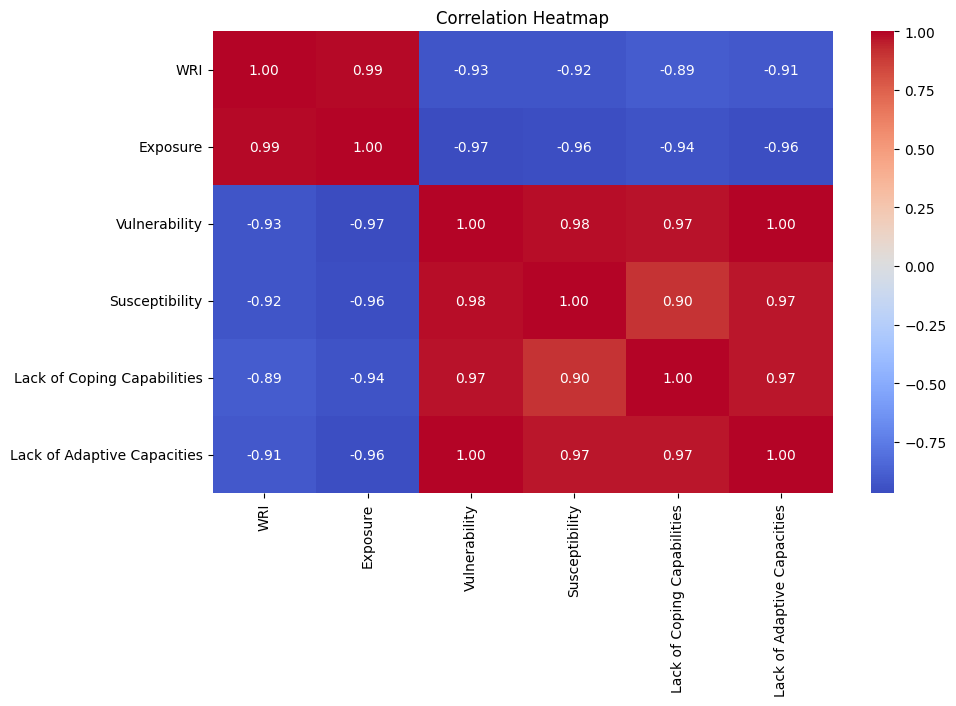

In [20]:
plt.figure(figsize=(10,6))
correlation=data[columns].corr()
sns.heatmap(correlation.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

This highlights relationships between risk components, showing which factors are strongly corelated.

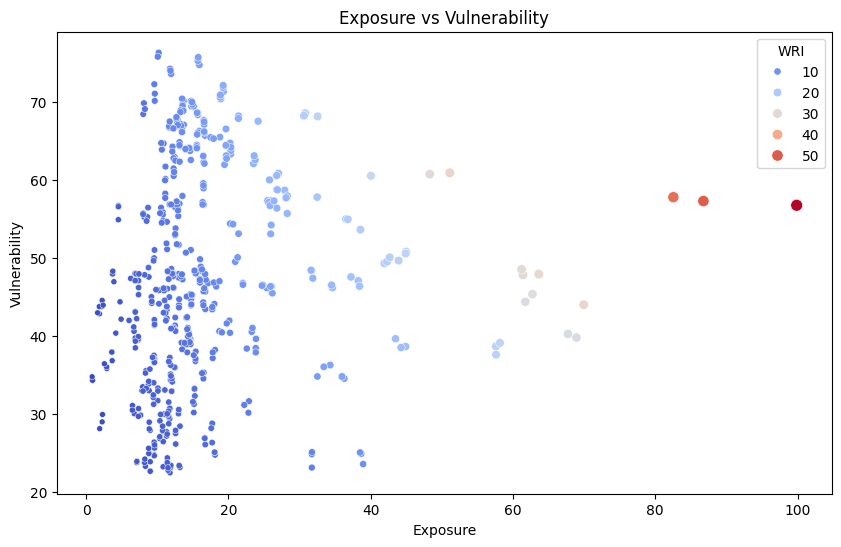

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=data,x='Exposure',y='Vulnerability',hue='WRI',size='WRI',palette='coolwarm')
plt.title("Exposure vs Vulnerability")
plt.show()

Insight: Countries with high exposure but low vulnerabilty than those with high exposure and high vulnerability.

In [ ]:
print(data[columns].skew())

WRI                            2.816181
Exposure                       2.863928
Vulnerability                  0.169711
Susceptibility                 0.924164
Lack of Coping Capabilities   -0.689206
Lack of Adaptive Capacities    0.181481
dtype: float64


In [ ]:
data.drop(['Country','Year'],axis=1,inplace=True)

In [ ]:

# List of categorical columns
categorical_columns = ['Exposure Category', 'WRI Category', 'Vulnerability Category', 'Susceptibility Category']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
print(data)

       WRI  Exposure  Vulnerability  Susceptibility  \
0    56.71     99.88          56.78           35.32   
1    30.80     69.95          44.03           23.38   
2    29.39     61.41          47.86           28.19   
3    29.36     48.31          60.77           46.37   
4    22.87     44.98          50.84           26.41   
..     ...       ...            ...             ...   
537   1.06      2.40          43.98           26.36   
538   0.94      2.58          36.46           13.83   
539   0.70      1.62          43.00           28.16   
540   0.69      2.31          29.96           15.04   
541   0.30      0.85          34.80            9.03   

     Lack of Coping Capabilities  Lack of Adaptive Capacities  \
0                          84.36                        50.66   
1                          76.65                        32.05   
2                          79.92                        35.47   
3                          80.95                        55.00   
4             

In [ ]:
X=data[['Exposure','WRI','Lack of Coping Capabilities','Lack of Adaptive Capacities',]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
# Regression Target Variable
y_reg = data['Vulnerability']
# Classification Target Variable
y_exp = label_encoder.fit_transform(data['Exposure Category'])

# Train-Test Split for Regression and Classification
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X, y_exp, test_size=0.2, random_state=42)


In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions=np.dot(X,theta)
    cost=(1/(2*m))*np.sum((predictions-y)**2)
    return cost
def gradient_descent(X, y, theta, learning_rate,epochs):
    m = len(y)
    cost_history = []
    for i in range(epochs):
        y_pred=np.dot(X,theta)
        error=y_pred-y
        gradient=(1/m)*np.dot(X.T,error)
        theta=theta-learning_rate*gradient
        cost=compute_cost(X,y,theta)
        cost_history.append(cost)
    return theta, cost_history
def linear_regression(X, y, learning_rate=0.01, epochs=1000):
    X=np.c_[np.ones(X.shape[0]),X]
    theta=np.zeros(X.shape[1])
    return gradient_descent(X,y,theta,learning_rate,epochs)
def predict(X, theta):
    X=np.c_[np.ones(X.shape[0]),X]
    return np.dot(X,theta)
def mean_squared_error(y, y_pred):
    return np.mean((y-y_pred)**2)
def mean_absolute_error(y, y_pred):
    return np.mean(np.abs(y-y_pred))
def r2_score(y, y_pred):
    ssr=np.sum((y-y_pred)**2)
    sst=np.sum((y-np.mean(y))**2)
    return 1-(ssr/sst)
def evaluate_model(y_train, y_train_pred, y_test, y_test_pred):
    metrics={}
    #Train Metrics
    metrics["Train MAE"]=mean_absolute_error(y_train, y_train_pred)
    metrics["Train R2"]=r2_score(y_train, y_train_pred)
    metrics["Train MSE"]=mean_squared_error(y_train, y_train_pred)
    #Test Metrics
    metrics["Test MAE"]=mean_absolute_error(y_test, y_test_pred)
    metrics["Test R2"]=r2_score(y_test, y_test_pred)
    metrics["Test MSE"]=mean_squared_error(y_test, y_test_pred)
    return metrics
# Train the linear regression model to get theta
theta, _ = linear_regression(X_train_reg, y_train_reg)

# Predict using the trained theta
y_train_pred = predict(X_train_reg, theta)
y_test_pred = predict(X_test_reg, theta)

metrics = evaluate_model(y_train_reg, y_train_pred, y_test_reg, y_test_pred)
for metric, value in metrics.items():
    print(f"{metric}: {value:.2f}")

Train MAE: 1.82
Train R2: 0.97
Train MSE: 5.49
Test MAE: 1.99
Test R2: 0.97
Test MSE: 6.66


In [ ]:
#Primary model
#Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_reg, y_train_reg)
y_pred_train_lr = lr_model.predict(X_train_reg)
y_pred_test_lr = lr_model.predict(X_test_reg)
mse_train_lr=mean_squared_error(y_train_reg, y_pred_train_lr)
r2_train_lr=r2_score(y_train_reg, y_pred_train_lr)
mae_train_lr=mean_absolute_error(y_train_reg, y_pred_train_lr)
print(f'Training MSE: {mse_train_lr:.2f}')
print(f'Training R2: {r2_train_lr:.2f}')
print(f'Training MAE: {mae_train_lr:.2f}')
mse_test_lr=mean_squared_error(y_test_reg, y_pred_test_lr)
r2_test_lr=r2_score(y_test_reg, y_pred_test_lr)
mae_test_lr=mean_absolute_error(y_test_reg, y_pred_test_lr)
print(f'Test MSE: {mse_test_lr:.2f}')
print(f'Test R2: {r2_test_lr:.2f}')
print(f'Test MAE: {mae_test_lr:.2f}')



Training MSE: 5.15
Training R2: 0.97
Training MAE: 1.71
Test MSE: 6.97
Test R2: 0.97
Test MAE: 2.00


In [ ]:
#Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train_reg, y_train_reg)
y_pred_train_ridge = ridge_model.predict(X_train_reg)
y_pred_test_ridge = ridge_model.predict(X_test_reg)
mse_train_ridge=mean_squared_error(y_train_reg, y_pred_train_ridge)
r2_train_ridge=r2_score(y_train_reg, y_pred_train_ridge)
mae_train_ridge=mean_absolute_error(y_train_reg, y_pred_train_ridge)
print(f'Training MSE: {mse_train_ridge:.2f}')
print(f'Training R2: {r2_train_ridge:.2f}')
print(f'Training MAE: {mae_train_ridge:.2f}')
mse_test_ridge=mean_squared_error(y_test_reg, y_pred_test_ridge)
r2_test_ridge=r2_score(y_test_reg, y_pred_test_ridge)
mae_test_ridge=mean_absolute_error(y_test_reg, y_pred_test_ridge)
print(f'Test MSE: {mse_test_ridge:.2f}')
print(f'Test R2: {r2_test_ridge:.2f}')
print(f'Test MAE: {mae_test_ridge:.2f}'),.

Training MSE: 5.15
Training R2: 0.97
Training MAE: 1.71
Test MSE: 6.88
Test R2: 0.97
Test MAE: 1.98


In [ ]:
# Get the best parameters
#Hyperparameter Tuning
#Linear Regression model
# Create a Linear Regression model
lr = LinearRegression()

# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1]
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X_train_reg, y_train_reg)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}


In [ ]:
#Ridge Regression model Hyperparameter Tuning
ridge=Ridge()
param_grid={
    'alpha':[0.1,5,50,500,1000],
    'max_iter':[100,500,1000,2000],
    'tol':[0.001,0.01,0.1,1]
}
grid_search=GridSearchCV(ridge,param_grid,cv=5)
grid_search.fit(X_train_reg,y_train_reg)
best_params=grid_search.best_params_
best_model=grid_search.best_estimator_
best_params

{'alpha': 0.1, 'max_iter': 100, 'tol': 0.001}

In [ ]:
#Feature Selection
#linear regression feature selection
# Feature Selection using SelectKBest
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train_reg, y_train_reg)

# Get the scores for each feature
feature_scores = selector.scores_

# Ensure the number of features matches the length of feature_scores
features = ['Exposure', 'WRI', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities']

# Create a DataFrame to display the scores
feature_scores_df = pd.DataFrame({'Feature': features, 'Score': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

print(feature_scores_df)



                       Feature        Score
3  Lack of Adaptive Capacities  8515.010816
2  Lack of Coping Capabilities  2560.363582
1                          WRI   106.731271
0                     Exposure     5.095494


In [ ]:
from sklearn.feature_selection import RFE

# Feature Selection using Recursive Feature Elimination (RFE) for Ridge Regression

ridge = Ridge()
selector_rfe = RFE(estimator=ridge, n_features_to_select=3)
selector_rfe.fit(X_train_reg, y_train_reg)

# Get the ranking of features
feature_ranking = selector_rfe.ranking_

# Create a DataFrame to display the rankings
features = ['Exposure', 'WRI', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities',]
feature_ranking_df = pd.DataFrame({'Feature': features, 'Ranking': feature_ranking})

# Sort the DataFrame by ranking in ascending order
feature_ranking_df = feature_ranking_df.sort_values(by='Ranking')

print(feature_ranking_df)


                       Feature  Ranking
1                          WRI        1
2  Lack of Coping Capabilities        1
3  Lack of Adaptive Capacities        1
0                     Exposure        2


In [ ]:
# Assuming the final model is Ridge Regression based on previous performance comparison
final_model = Ridge(**best_params)
final_model.fit(X_train_reg, y_train_reg)

# Predictions
y_train_pred_final = final_model.predict(X_train_reg)
y_test_pred_final = final_model.predict(X_test_reg)

# Train Metrics
train_mse_final = mean_squared_error(y_train_reg, y_train_pred_final)
train_r2_final = r2_score(y_train_reg, y_train_pred_final)
train_mae_final = mean_absolute_error(y_train_reg, y_train_pred_final)

# Test Metrics
test_mse_final = mean_squared_error(y_test_reg, y_test_pred_final)
test_r2_final = r2_score(y_test_reg, y_test_pred_final)
test_mae_final = mean_absolute_error(y_test_reg, y_test_pred_final)

# Print Train Metrics
print(f'Final Model Training MSE: {train_mse_final:.2f}')
print(f'Final Model Training R2: {train_r2_final:.2f}')
print(f'Final Model Training MAE: {train_mae_final:.2f}')

# Print Test Metrics
print(f'Final Model Test MSE: {test_mse_final:.2f}')
print(f'Final Model Test R2: {test_r2_final:.2f}')
print(f'Final Model Test MAE: {test_mae_final:.2f}')


Final Model Training MSE: 5.15
Final Model Training R2: 0.97
Final Model Training MAE: 1.71
Final Model Test MSE: 6.96
Final Model Test R2: 0.97
Final Model Test MAE: 1.99


In [ ]:

from sklearn.preprocessing import OneHotEncoder

# Define softmax function
def softmax(z):
    z = np.atleast_2d(z)  # Ensures input is 2D
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability trick
    return exp_z / exp_z.sum(axis=1, keepdims=True)

# Define cross-entropy loss function
def softmax_loss(y_true, y_pred):
    m = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-9)) / m  # Adding 1e-9 to prevent log(0)
    return loss
# Apply StandardScaler to the features
scaler = StandardScaler()
X_train_exp_scaled = scaler.fit_transform(X_train_exp)
X_test_exp_scaled = scaler.transform(X_test_exp)
def softmax_gradient_descent(X, y, theta, learning_rate, epochs):
    m = X.shape[0]
    cost_history = []
    
    for _ in range(epochs):
        z = np.dot(X, theta)
        y_pred = softmax(z)
        error = y_pred - y
        gradient = np.dot(X.T, error) / m
        theta -= learning_rate * gradient
        cost = softmax_loss(y, y_pred)
        cost_history.append(cost)
    
    return theta, cost_history

# Train the softmax regression model
def softmax_regression(X, y, learning_rate=0.001, epochs=3000):
    X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
    n_features = X.shape[1]
    n_classes = y.shape[1]
    
    theta = np.zeros((n_features, n_classes))
    theta, cost_history = softmax_gradient_descent(X, y, theta, learning_rate, epochs)
    
    return theta, cost_history

# Predict using the softmax regression model
def predict_softmax(X, theta):
    X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term
    z = np.dot(X, theta)
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)  # Return class with highest probability

# Evaluate the softmax regression model
def evaluate_softmax_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# One-hot encode target labels
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_train_exp_onehot = encoder.fit_transform(y_train_exp.reshape(-1, 1))
y_test_exp_onehot = encoder.transform(y_test_exp.reshape(-1, 1))

# Train the softmax regression model
theta_softmax, cost_history_softmax = softmax_regression(X_train_exp, y_train_exp_onehot, learning_rate=0.1, epochs=3600)

# Predict using the trained softmax regression model
y_train_pred_softmax = predict_softmax(X_train_exp, theta_softmax)
y_test_pred_softmax = predict_softmax(X_test_exp, theta_softmax)

# Evaluate the softmax regression model
train_accuracy, train_precision, train_recall, train_f1 = evaluate_softmax_model(y_train_exp, y_train_pred_softmax)
test_accuracy, test_precision, test_recall, test_f1 = evaluate_softmax_model(y_test_exp, y_test_pred_softmax)

# Print evaluation results
print(f"Train Accuracy: {train_accuracy:.2f}")
print(f"Train Precision: {train_precision:.2f}")
print(f"Train Recall: {train_recall:.2f}")
print(f"Train F1 Score: {train_f1:.2f}")

print(f"Test Accuracy: {test_accuracy:.2f}")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")
print(f"Test F1 Score: {test_f1:.2f}")

Train Accuracy: 0.88
Train Precision: 0.88
Train Recall: 0.88
Train F1 Score: 0.88
Test Accuracy: 0.87
Test Precision: 0.87
Test Recall: 0.87
Test F1 Score: 0.87


In [ ]:
# Logistic Regression from sklearn
logistic_model = LogisticRegression()
logistic_model.fit(X_train_exp, y_train_exp)
y_pred_train_logistic = logistic_model.predict(X_train_exp)
y_pred_test_logistic = logistic_model.predict(X_test_exp)
accuracy_train_logistic=accuracy_score(y_train_exp, y_pred_train_logistic)
precision_train_logistic=precision_score(y_train_exp, y_pred_train_logistic, average='weighted')
recall_train_logistic=recall_score(y_train_exp, y_pred_train_logistic, average='weighted')
f1_train_logistic=f1_score(y_train_exp, y_pred_train_logistic, average='weighted')
print(f'Training Accuracy: {accuracy_train_logistic:.2f}')  
print(f'Training Precision: {precision_train_logistic:.2f}')
print(f'Training Recall: {recall_train_logistic:.2f}')
print(f'Training F1 Score: {f1_train_logistic:.2f}')
accuracy_test_logistic=accuracy_score(y_test_exp, y_pred_test_logistic)
precision_test_logistic=precision_score(y_test_exp, y_pred_test_logistic, average='weighted')
recall_test_logistic=recall_score(y_test_exp, y_pred_test_logistic, average='weighted')
f1_test_logistic=f1_score(y_test_exp, y_pred_test_logistic, average='weighted')
print(f'Test Accuracy: {accuracy_test_logistic:.2f}')
print(f'Test Precision: {precision_test_logistic:.2f}')
print(f'Test Recall: {recall_test_logistic:.2f}')
print(f'Test F1 Score: {f1_test_logistic:.2f}')


Training Accuracy: 0.88
Training Precision: 0.88
Training Recall: 0.88
Training F1 Score: 0.88
Test Accuracy: 0.86
Test Precision: 0.87
Test Recall: 0.86
Test F1 Score: 0.86


In [ ]:
#Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train_exp, y_train_exp)
y_pred_train_rf = rf_model.predict(X_train_exp)
y_pred_test_rf = rf_model.predict(X_test_exp)
accuracy_train_rf=accuracy_score(y_train_exp, y_pred_train_rf)
precision_train_rf=precision_score(y_train_exp, y_pred_train_rf, average='weighted')
recall_train_rf=recall_score(y_train_exp, y_pred_train_rf, average='weighted')
f1_train_rf=f1_score(y_train_exp, y_pred_train_rf, average='weighted')
print(f'Training Accuracy: {accuracy_train_rf:.2f}')
print(f'Training Precision: {precision_train_rf:.2f}')
print(f'Training Recall: {recall_train_rf:.2f}')
print(f'Training F1 Score: {f1_train_rf:.2f}')
accuracy_test_rf=accuracy_score(y_test_exp, y_pred_test_rf)
precision_test_rf=precision_score(y_test_exp, y_pred_test_rf, average='weighted')
recall_test_rf=recall_score(y_test_exp, y_pred_test_rf, average='weighted')
f1_test_rf=f1_score(y_test_exp, y_pred_test_rf, average='weighted')
print(f'Test Accuracy: {accuracy_test_rf:.2f}')
print(f'Test Precision: {precision_test_rf:.2f}')
print(f'Test Recall: {recall_test_rf:.2f}')
print(f'Test F1 Score: {f1_test_rf:.2f}')


Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1 Score: 1.00
Test Accuracy: 0.98
Test Precision: 0.98
Test Recall: 0.98
Test F1 Score: 0.98


In [ ]:

#Logistic Regression Hyperparameter Tuning

logistic = LogisticRegression()

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 1000, 2000]
}

# Apply GridSearchCV for hyperparameter tuning
grid_search_logistic = GridSearchCV(logistic, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logistic.fit(X_train_exp, y_train_exp)

# Get the best parameters
best_params_logistic = grid_search_logistic.best_params_
print("Best Parameters for Logistic Regression:", best_params_logistic)

Best Parameters for Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
#Random Forest Classifier Hyperparameter Tuning

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Apply GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_exp, y_train_exp)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest Classifier:", best_params_rf)
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y_exp, cv=5, scoring='accuracy')

# Print average cross-validation score
print(f'Average Cross-Validation Accuracy: {cv_scores.mean():.2f}')


Best Parameters for Random Forest Classifier: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Average Cross-Validation Accuracy: 0.96


In [ ]:
#Feature Selection of Logistic Regression
# Feature Selection using Recursive Feature Elimination (RFE) for Logistic Regression

logistic = LogisticRegression()
selector_rfe_logistic = RFE(estimator=logistic, n_features_to_select=3)
selector_rfe_logistic.fit(X_train_exp, y_train_exp)

# Get the ranking of features
feature_ranking_logistic = selector_rfe_logistic.ranking_

# Create a DataFrame to display the rankings
features = ['Exposure', 'WRI', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities', ]
feature_ranking_logistic_df = pd.DataFrame({'Feature': features,
                                            'Ranking': feature_ranking_logistic})

# Sort the DataFrame by ranking in ascending order
feature_ranking_logistic_df = feature_ranking_logistic_df.sort_values(by='Ranking')

print(feature_ranking_logistic_df)

                       Feature  Ranking
0                     Exposure        1
1                          WRI        1
3  Lack of Adaptive Capacities        1
2  Lack of Coping Capabilities        2


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Ensure all values in X_train_exp are non-negative
X_train_exp_non_negative = np.abs(X_train_exp)

# Apply SelectKBest to extract the top k features
k = 3  # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X_train_exp_non_negative, y_train_exp)

# Get the scores for each feature
feature_scores = selector.scores_

# Create a DataFrame to display the scores
features = ['Exposure', 'WRI', 'Lack of Coping Capabilities', 'Lack of Adaptive Capacities',]
feature_scores_df = pd.DataFrame({'Feature': features, 'Score': feature_scores})

# Sort the DataFrame by score in descending order
feature_scores_df = feature_scores_df.sort_values(by='Score', ascending=False)

print(feature_scores_df)

                       Feature       Score
0                     Exposure  160.696130
1                          WRI   91.677546
2  Lack of Coping Capabilities    9.182716
3  Lack of Adaptive Capacities    5.764594


In [ ]:
# Final Model based on Random Forest Classifier
final_rf_model = RandomForestClassifier(**best_params_rf)
final_rf_model.fit(X_train_exp, y_train_exp)

# Predictions
y_train_pred_final_rf = final_rf_model.predict(X_train_exp)
y_test_pred_final_rf = final_rf_model.predict(X_test_exp)

# Evaluate the final model
train_accuracy_final_rf = accuracy_score(y_train_exp, y_train_pred_final_rf)
train_precision_final_rf = precision_score(y_train_exp, y_train_pred_final_rf, average='weighted')
train_recall_final_rf = recall_score(y_train_exp, y_train_pred_final_rf, average='weighted')
train_f1_final_rf = f1_score(y_train_exp, y_train_pred_final_rf, average='weighted')

test_accuracy_final_rf = accuracy_score(y_test_exp, y_test_pred_final_rf)
test_precision_final_rf = precision_score(y_test_exp, y_test_pred_final_rf, average='weighted')
test_recall_final_rf = recall_score(y_test_exp, y_test_pred_final_rf, average='weighted')
test_f1_final_rf = f1_score(y_test_exp, y_test_pred_final_rf, average='weighted')

# Print Train Metrics
print(f'Final Model Training Accuracy: {train_accuracy_final_rf:.2f}')
print(f'Final Model Training Precision: {train_precision_final_rf:.2f}')
print(f'Final Model Training Recall: {train_recall_final_rf:.2f}')
print(f'Final Model Training F1 Score: {train_f1_final_rf:.2f}')

# Print Test Metrics
print(f'Final Model Test Accuracy: {test_accuracy_final_rf:.2f}')
print(f'Final Model Test Precision: {test_precision_final_rf:.2f}')
print(f'Final Model Test Recall: {test_recall_final_rf:.2f}')
print(f'Final Model Test F1 Score: {test_f1_final_rf:.2f}')

Final Model Training Accuracy: 0.98
Final Model Training Precision: 0.98
Final Model Training Recall: 0.98
Final Model Training F1 Score: 0.98
Final Model Test Accuracy: 0.98
Final Model Test Precision: 0.98
Final Model Test Recall: 0.98
Final Model Test F1 Score: 0.98
